In [ ]:
KODE PYTHON CLUSTERING KOTA

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [17]:
data = {
    'Kota': ['Jakarta', 'Surabaya', 'Bandung', 'Medan', 'Makassar', 'Semarang', 
             'Yogyakarta', 'Palembang', 'Denpasar', 'Balikpapan', 'Banjarmasin', 
             'Pontianak', 'Batam', 'Malang', 'Samarinda', 'Pekanbaru', 'Manado', 
             'Padang', 'Bandar Lampung', 'Mataram'],
    'Jumlah Penduduk (juta jiwa)': [10.5, 2.9, 2.5, 2.4, 1.5, 1.7, 0.4, 1.6, 0.9, 0.7, 
                                    0.6, 0.6, 1.1, 0.8, 0.8, 1.2, 0.5, 0.9, 1.0, 0.5],
    'Luas Wilayah (km²)': [662, 350, 167, 265, 199, 373, 32, 400, 127, 503, 98, 107, 
                           715, 145, 718, 632, 157, 695, 197, 61],
    'Tingkat Pengangguran (%)': [7.5, 6.0, 7.0, 5.8, 5.0, 5.3, 4.8, 6.5, 4.0, 5.2, 
                                 4.9, 5.5, 4.3, 6.0, 5.0, 6.2, 5.7, 5.9, 5.4, 5.1],
    'PDRB per Kapita (juta rupiah)': [200, 150, 120, 110, 100, 130, 90, 105, 140, 
                                      160, 95, 85, 150, 110, 120, 135, 90, 115, 100, 85]
}

df = pd.DataFrame(data)
print(df)

              Kota  Jumlah Penduduk (juta jiwa)  Luas Wilayah (km²)  \
0          Jakarta                         10.5                 662   
1         Surabaya                          2.9                 350   
2          Bandung                          2.5                 167   
3            Medan                          2.4                 265   
4         Makassar                          1.5                 199   
5         Semarang                          1.7                 373   
6       Yogyakarta                          0.4                  32   
7        Palembang                          1.6                 400   
8         Denpasar                          0.9                 127   
9       Balikpapan                          0.7                 503   
10     Banjarmasin                          0.6                  98   
11       Pontianak                          0.6                 107   
12           Batam                          1.1                 715   
13    

In [21]:
# Memilih fitur yang akan digunakan untuk clustering
features = ['Jumlah Penduduk (juta jiwa)', 'Luas Wilayah (km²)', 'Tingkat Pengangguran (%)', 'PDRB per Kapita (juta rupiah)']

# Melakukan scaling terhadap data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Menampilkan data yang sudah dinormalisasi
print(scaled_data)

[[ 4.12378961  1.41102651  2.34069931  2.79041616]
 [ 0.58045427  0.08440222  0.53553275  1.05723842]
 [ 0.39396294 -0.69371395  1.73897712  0.01733178]
 [ 0.34734011 -0.27701786  0.29484387 -0.32930377]
 [-0.07226539 -0.55764992 -0.66791163 -0.67593932]
 [ 0.02098027  0.18219824 -0.30687832  0.36396733]
 [-0.58511656 -1.26773408 -0.9086005  -1.02257487]
 [-0.02564256  0.29700227  1.13725493 -0.50262154]
 [-0.35200239 -0.86379399 -1.871356    0.71060287]
 [-0.44524806  0.73495836 -0.42722275  1.40387397]
 [-0.49187089 -0.98710202 -0.78825606 -0.84925709]
 [-0.49187089 -0.94883401 -0.06618944 -1.19589264]
 [-0.25875672  1.63638256 -1.51032269  1.05723842]
 [-0.39862522 -0.78725797  0.53553275 -0.32930377]
 [-0.39862522  1.64913856 -0.66791163  0.01733178]
 [-0.21213389  1.28346648  0.77622162  0.5372851 ]
 [-0.53849372 -0.73623396  0.17449943 -1.02257487]
 [-0.35200239  1.55134254  0.41518831 -0.155986  ]
 [-0.30537956 -0.56615392 -0.18653388 -0.67593932]
 [-0.53849372 -1.14442605 -0.54

In [25]:
#Melakukan Clustering 
# Menggunakan KMeans dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Menampilkan hasil clustering
print(df[['Kota', 'Cluster']])

              Kota  Cluster
0          Jakarta        2
1         Surabaya        0
2          Bandung        0
3            Medan        0
4         Makassar        1
5         Semarang        0
6       Yogyakarta        1
7        Palembang        0
8         Denpasar        1
9       Balikpapan        0
10     Banjarmasin        1
11       Pontianak        1
12           Batam        0
13          Malang        1
14       Samarinda        0
15       Pekanbaru        0
16          Manado        1
17          Padang        0
18  Bandar Lampung        1
19         Mataram        1


D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


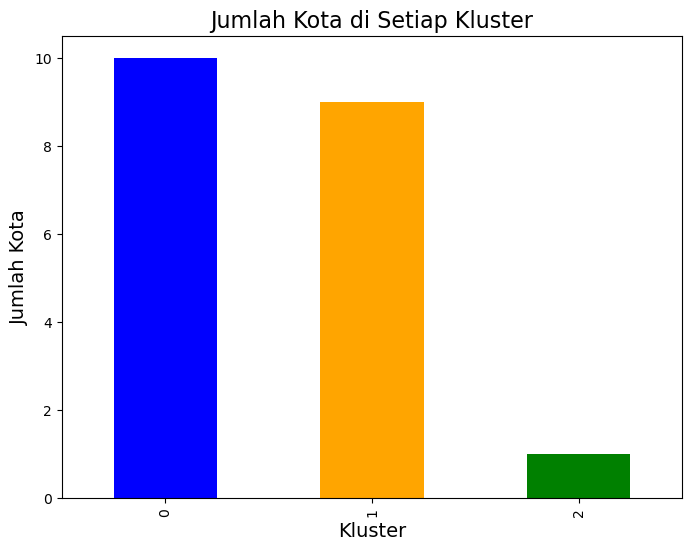

In [35]:
# Menghitung jumlah kota di setiap kluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Membuat grafik batang
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color=['blue', 'orange', 'green'])

# Menambahkan judul dan label
plt.title('Jumlah Kota di Setiap Kluster', fontsize=16)
plt.xlabel('Kluster', fontsize=14)
plt.ylabel('Jumlah Kota', fontsize=14)

# Menampilkan grafik
plt.show()

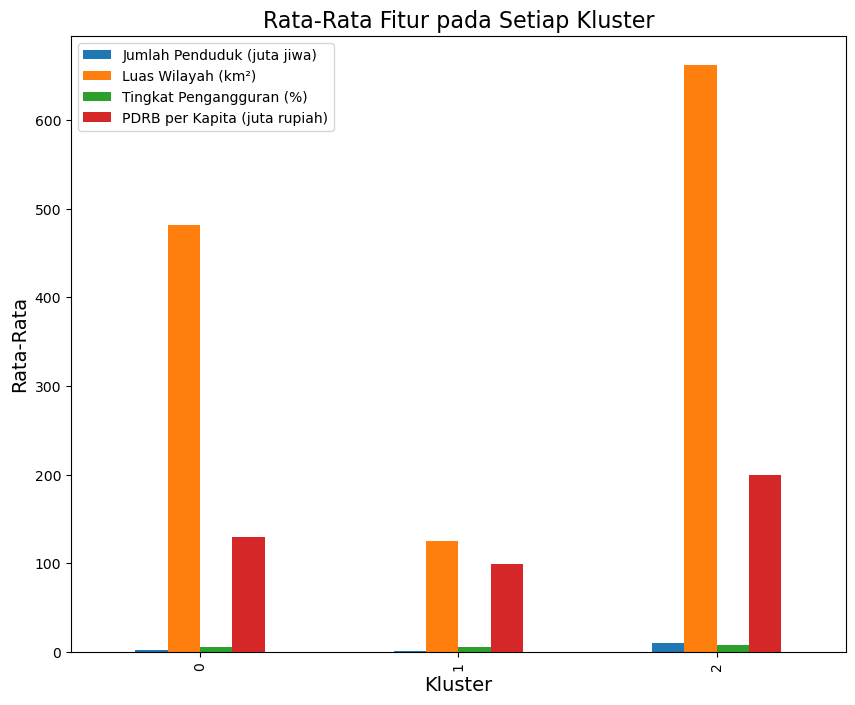

In [33]:
# Menghitung rata-rata setiap fitur berdasarkan kluster
cluster_means = df.groupby('Cluster')[features].mean()

# Membuat grafik batang untuk rata-rata fitur per kluster
cluster_means.plot(kind='bar', figsize=(10, 8))

# Menambahkan judul dan label
plt.title('Rata-Rata Fitur pada Setiap Kluster', fontsize=16)
plt.xlabel('Kluster', fontsize=14)
plt.ylabel('Rata-Rata', fontsize=14)

# Menampilkan grafik
plt.show()